In [5]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel

In [6]:
models = []
num_models = 3
#potential_values = np.linspace(0, 1, num_models)
for i in range(num_models):
    nsteps=200
    nagents=20
    #P = []
    #for i in range(nagents):
    #    arr = []
    #    for j in range(nagents):
    #        arr.append(-1)
    #    P.append(arr)
    neighbs = neighbors.totally_connected(nagents, self_connected=True)
    #neighbors = degree_connected(nagents, 1) #the second parameter ranges from 0 to 1, generates graphs of varying degrees of connectedness.
    linspaced = np.linspace(0, 1, nagents).tolist()
    opinions = [[i] for i in linspaced]
    #opinions = #[[np.random.rand()] for i in range(nagents)]
    #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
    pots = [potentials.tent(.63) for i in range(nagents)]
    coupling = [[1]]
    model = OpinionModel(nagents, neighbs, None, opinions, pots, coupling, 'pairwise')
    models.append(model)

In [9]:
import cProfile
def fn():
    for model in models:
        model.ALPHA = .01
        for i in range(nsteps):
            model.run(1)
            model.total_change()
        #model.run(nsteps)
        
cProfile.run('fn()')

         822086 function calls in 4.953 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.003    0.003    4.953    4.953 <ipython-input-9-26554de08be2>:2(fn)
        1    0.000    0.000    4.953    4.953 <string>:1(<module>)
    12000    0.052    0.000    0.892    0.000 <string>:5(_parse_args_rvs)
    12000    0.086    0.000    0.086    0.000 _continuous_distns.py:4625(_argcheck)
    12000    0.624    0.000    1.144    0.000 _continuous_distns.py:4631(_rvs)
    12000    0.176    0.000    0.840    0.000 _distn_infrastructure.py:789(_argcheck_rvs)
    36000    0.022    0.000    0.022    0.000 _distn_infrastructure.py:803(squeeze_left)
    12000    0.036    0.000    0.058    0.000 _distn_infrastructure.py:819(<listcomp>)
    12000    0.008    0.000    0.008    0.000 _distn_infrastructure.py:848(<listcomp>)
    12000    0.584    0.000    3.374    0.000 _distn_infrastructure.py:909(rvs)
    24000    0.034    0.000  

In [20]:
def fn2():
    agent_opinions = []
    for model in models:
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        agent_opinions.append(agent_opinion)
cProfile.run('fn2()')

         1288354 function calls (1287354 primitive calls) in 3.520 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1500    0.003    0.000    0.008    0.000 <frozen importlib._bootstrap>:996(_handle_fromlist)
        1    0.127    0.127    3.519    3.519 <ipython-input-20-fb5b18aa0773>:1(fn2)
        1    0.001    0.001    3.520    3.520 <string>:1(<module>)
       50    0.000    0.000    0.000    0.000 __init__.py:120(lzip)
   200450    0.293    0.000    0.444    0.000 __init__.py:177(iteritems)
      150    0.000    0.000    0.005    0.000 _methods.py:37(_any)
      100    0.000    0.000    0.003    0.000 _methods.py:40(_all)
      100    0.000    0.000    0.000    0.000 _validators.py:220(validate_bool_kwarg)
      100    0.002    0.000    0.009    0.000 algorithms.py:132(_reconstruct_data)
      100    0.001    0.000    0.001    0.000 algorithms.py:1337(_get_take_nd_function)
      100    0.008    0.000    0.032    

       50    0.000    0.000    0.000    0.000 internals.py:303(dtype)
       50    0.000    0.000    0.001    0.000 internals.py:307(ftype)
       50    0.000    0.000    0.000    0.000 internals.py:3296(is_consolidated)
       50    0.000    0.000    0.001    0.000 internals.py:3304(_consolidate_check)
       50    0.000    0.000    0.001    0.000 internals.py:3305(<listcomp>)
       50    0.000    0.000    0.000    0.000 internals.py:3576(_consolidate_inplace)
       50    0.001    0.000    0.052    0.001 internals.py:4306(create_block_manager_from_arrays)
       50    0.003    0.000    0.037    0.001 internals.py:4317(form_blocks)
       50    0.001    0.000    0.011    0.000 internals.py:4441(_multi_blockify)
       50    0.000    0.000    0.000    0.000 internals.py:4445(<lambda>)
       50    0.002    0.000    0.004    0.000 internals.py:4473(_stack_arrays)
       50    0.000    0.000    0.001    0.000 internals.py:4476(_asarray_compat)
       50    0.000    0.000    0.000    0.0

In [21]:
for model in models:
    model.ALPHA = .01
    model.run(nsteps)
agent_opinions = []
for model in models:
    agent_opinion = model.datacollector.get_agent_vars_dataframe()
    agent_opinions.append(agent_opinion)
x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
plt.plot(x);

ValueError: cannot reshape array of size 8000 into shape (200,20)

average: 2.000000 for tau: 0.630000


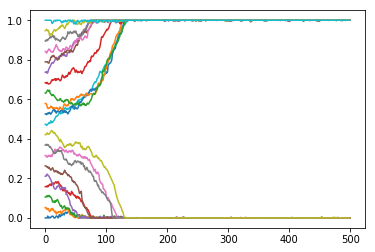

In [2]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel
import UF_read

tau = .63
while tau > .4:
    models = []
    num_models = 1
    #potential_values = np.linspace(0, 1, num_models)
    for i in range(num_models):
        nsteps=500
        nagents=20
        #P = []
        #for i in range(nagents):
        #    arr = []
        #    for j in range(nagents):
        #        arr.append(-1)
        #    P.append(arr)
        neighbs = neighbors.totally_connected(nagents, self_connected=True)
        #neighbors = degree_connected(nagents, 1) #the second parameter ranges from 0 to 1, generates graphs of varying degrees of connectedness.
        linspaced = np.linspace(0, 1, nagents).tolist()
        opinions = [[i] for i in linspaced]
        #opinions = [[np.random.rand()] for i in range(nagents)]
        #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
        pots = [potentials.tent(tau) for i in range(nagents)]
        coupling = [[1]]
        model = OpinionModel(nagents, neighbs, None, opinions, pots, coupling, 'pairwise')
        models.append(model)
    for model in models:
        model.ALPHA = .005
        model.run(nsteps)
    agent_opinions = []
    for model in models:
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        agent_opinions.append(agent_opinion)
    x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
    plt.plot(x);
    from analysis import opinions_clusters
    from analysis import num_clusters
    sum = 0
    for i in range(num_models):
        for j in range(len(opinions[0])):
            #print("Model %d Opinion %d:" % (i, j))
            #print(num_clusters(models[i], .4)[j])
            sum += num_clusters(models[i], .4)[j]

    #print(sum)
    print("average: %f for tau: %f" %(float(sum) / float(num_models), tau))
    tau = .4

In [3]:
from opinions import OpinionAgentParameters
from opinions import OpinionAgent
point_5 = lambda a: .5
a = OpinionAgent(OpinionAgentParameters(0, model, [[1],[0]], potentials.tent(.5), [1, 1]))
print(len(a.weights))
print(len(a.model.schedule.agents))
model

NameError: name 'model' is not defined

average: 2.000000 for tau: 0.580000


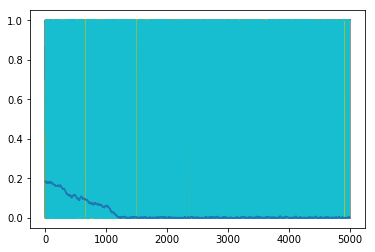

In [37]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel
import UF_read

tau = .58
while tau < .76:
    models = []
    num_models = 1
    #potential_values = np.linspace(0, 1, num_models)
    for i in range(num_models):
        #Setup neighbors
        weights = UF_read.read('neighborhood_matrices/lns_131.mat')
        nsteps=5000
        
        neighborhood = neighbors.weight_to_neighbors(weights)
        nagents= len(neighborhood)
        #setup initial opinions
        linspaced = np.linspace(0, 1, nagents).tolist()
        #opinions = [[i] for i in linspaced]
        
        opinions = [[np.random.rand()] for i in range(nagents)]
        #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
        
        #Potentials and coupling
        pots = [potentials.simple() for i in range(nagents)]
        coupling = [[1]]
        model = OpinionModel(nagents, neighborhood, weights, opinions, pots, coupling, 'pairwise')
        models.append(model)
    for model in models:
        model.ALPHA = .001
        model.run(nsteps)
    agent_opinions = []
    for model in models:
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        agent_opinions.append(agent_opinion)
    x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
    plt.plot(x);
    from analysis import opinions_clusters
    from analysis import num_clusters
    sum = 0
    for i in range(num_models):
        for j in range(len(opinions[0])):
            #print("Model %d Opinion %d:" % (i, j))
            #print(num_clusters(models[i], .4)[j])
            sum += num_clusters(models[i], .4)[j]

    #print(sum)
    print("average: %f for tau: %f" %(float(sum) / float(num_models), tau))
    tau = .76

In [22]:
#Graph experiment
import os
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel
import UF_read
from analysis import opinions_clusters
from analysis import num_clusters

graphs = []
for file in os.listdir("./neighborhood_matrices"):
    if file.endswith('.mat'):
        graphs.append('neighborhood_matrices/' + file)
tau = .5
for g in graphs:
    print(g)
    models = []
    num_models = 1
    #potential_values = np.linspace(0, 1, num_models)
    for i in range(num_models):
        #Setup neighbors
        weights = UF_read.read(g)
        if len(weights) != len(weights[0]):
            break #Not a square matrix.t
        nsteps=500
        nagents= len(weights)
        neighborhood = neighbors.weight_to_neighbors(weights)
        
        #setup initial opinions
        linspaced = np.linspace(0, 1, nagents).tolist()
        opinions = [[i] for i in linspaced]
        
        #opinions = [[np.random.rand()] for i in range(nagents)]
        #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
        
        #Potentials and coupling
        pots = [potentials.tent(tau) for i in range(nagents)]
        coupling = [[1]]
        model = OpinionModel(nagents, neighborhood, weights, opinions, pots, coupling, 'pairwise')
        models.append(model)
    for model in models:
        model.ALPHA = .01
        model.run(nsteps)
    agent_opinions = []
    for model in models:
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        agent_opinions.append(agent_opinion)
    x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))

    sum = 0
    for i in range(num_models):
        for j in range(len(opinions[0])):
            #print("Model %d Opinion %d:" % (i, j))
            #print(num_clusters(models[i], .4)[j])
            sum += num_clusters(models[i], .4)[j]

    #print(sum)
    print("average: %f  clusters for %s." %(float(sum) / float(num_models), g))

neighborhood_matrices/cage5.mat
average: 2.000000  clusters for neighborhood_matrices/cage5.mat.
neighborhood_matrices/lns_131.mat
average: 3.000000  clusters for neighborhood_matrices/lns_131.mat.
neighborhood_matrices/wheel_3_1.mat


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [21]:
#This test measures tendency towards convergence as it relates to the size of the graph.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel
import UF_read
from analysis import opinions_clusters
from analysis import num_clusters
cluster_counter = [[0,0, 0, 0, 0, 0, 0] for i in range(30)]
for graph_size in range(1, 30):
    for i in range(40):
        g = neighbors.totally_connected(graph_size) 
        weights = None
        nsteps = 300
        nagents = len(g)
        linspaced = np.linspace(0, 1, nagents).tolist()
        opinions = [[i] for i in linspaced]
        pots = [potentials.tent(.7) for i in range(nagents)]
        coupling = [[1]]
        model = OpinionModel(nagents, g, weights, opinions, pots, coupling, 'pairwise')
        model.ALPHA = .01
        model.run(nsteps)
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        a = num_clusters(model)[0]
        print("graph_size: %d num_clusters: %d" % (graph_size, a))
        cluster_counter[graph_size][a - 1] += 1
        #x=agent_opinion.Opinion0.as_matrix().reshape((nsteps, nagents))
        #plt.plot(x)
        

graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size: 1 num_clusters: 1
graph_size

graph_size: 7 num_clusters: 2
graph_size: 7 num_clusters: 2
graph_size: 7 num_clusters: 2
graph_size: 7 num_clusters: 1
graph_size: 7 num_clusters: 2
graph_size: 7 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size: 8 num_clusters: 2
graph_size

graph_size: 14 num_clusters: 2
graph_size: 14 num_clusters: 1
graph_size: 14 num_clusters: 1
graph_size: 14 num_clusters: 2
graph_size: 14 num_clusters: 2
graph_size: 14 num_clusters: 2
graph_size: 14 num_clusters: 2
graph_size: 14 num_clusters: 1
graph_size: 14 num_clusters: 2
graph_size: 14 num_clusters: 1
graph_size: 14 num_clusters: 2
graph_size: 14 num_clusters: 2
graph_size: 14 num_clusters: 2
graph_size: 14 num_clusters: 2
graph_size: 14 num_clusters: 1
graph_size: 14 num_clusters: 2
graph_size: 14 num_clusters: 1
graph_size: 14 num_clusters: 2
graph_size: 15 num_clusters: 2
graph_size: 15 num_clusters: 2
graph_size: 15 num_clusters: 2
graph_size: 15 num_clusters: 2
graph_size: 15 num_clusters: 1
graph_size: 15 num_clusters: 2
graph_size: 15 num_clusters: 1
graph_size: 15 num_clusters: 2
graph_size: 15 num_clusters: 2
graph_size: 15 num_clusters: 1
graph_size: 15 num_clusters: 2
graph_size: 15 num_clusters: 2
graph_size: 15 num_clusters: 2
graph_size: 15 num_clusters: 2
graph_si

graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 1
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 2
graph_size: 21 num_clusters: 2
graph_si

graph_size: 27 num_clusters: 2
graph_size: 27 num_clusters: 2
graph_size: 27 num_clusters: 2
graph_size: 27 num_clusters: 2
graph_size: 27 num_clusters: 2
graph_size: 27 num_clusters: 2
graph_size: 27 num_clusters: 2
graph_size: 27 num_clusters: 1
graph_size: 28 num_clusters: 2
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 2
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 2
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 2
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 2
graph_size: 28 num_clusters: 2
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 2
graph_size: 28 num_clusters: 2
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 1
graph_size: 28 num_clusters: 1
graph_si

In [26]:
#This test is part 1 of the email sent by Dr. S
'''
Pick a tent potential for the interaction potential function, set tau = 0.5 or 0.6.
Make sure we are working with a single connected component and an adjacency matrix that symmetric about the main diagonal (e.g., an undirected graph).  Let all weights be equal (1).
For a given adjacency matrix, run a single topic from some initial opinion state (e.g., evenly spaced initials) to equilibrium.  
Count how many interactions / iterations / timesteps are necessary to reach equilibrium (running many times with different random seeds if interaction pairs are randomly selected, so that we get a picture of the expected behavior regardless of interaction order).  
For this adjacency matrix, compute the median vertex degree, median betweenness centrality, median eigenvalue centrality or pagerank.  These are all found in the networkx python package.
'''
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import random
import csv

import potentials
import neighbors
import UF_read
from statistics import median
from opinions import OpinionModel
from analysis import opinions_clusters
from analysis import num_clusters
THRESHOLD = .0001

records = []
tau = .65
nagents = 20
nsteps = 700
step_inc = 1
random.seed()
for i in range(200):
    records.append({})
    neighborhood = neighbors.graph_to_matrix(nx.fast_gnp_random_graph(nagents, .7))
    weights = None
    linspaced = np.linspace(0, 1, nagents).tolist()
    opinions = [[i] for i in linspaced]
    pots = [potentials.tent(tau) for i in range(nagents)]
    coupling = [[1]]
    model = OpinionModel(nagents, neighborhood, weights, opinions, pots, coupling, 'pairwise')
    model.ALPHA = .01
    actual_steps = 0
    for j in range(nsteps):
        model.run(step_inc)
        actual_steps += step_inc
        if model.total_change() < THRESHOLD:
            break;
    #model.run(nsteps)
    agent_opinion = model.datacollector.get_agent_vars_dataframe()
    #a = num_clusters(model)[0]
    x=agent_opinion.Opinion0.as_matrix().reshape((actual_steps, nagents))
    records[i]['iterations'] = actual_steps
    
    g = neighbors.matrix_to_graph(neighborhood)
    bet = nx.betweenness_centrality(g)
    arr = []
    for keys in bet:
        arr.append(bet[keys])
    records[i]['median_betweeness_centrality'] = median(arr) #curious values.
    
    arr = []
    verts = nx.degree(g)
    for keys in verts:
        arr.append(verts[keys])
    records[i]['median_vertex_degree'] = median(arr)
    
    arr = []
    pageranks = nx.pagerank(g)
    for keys in pageranks:
        arr.append(pageranks[keys])
    records[i]['median_pagerank'] = median(arr)
    
    records[i]['num_opinions'] = num_clusters(model)
print(records)

record_keys = records[0].keys()
with open('test.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, record_keys)
    dict_writer.writeheader()
    dict_writer.writerows(records)

[{'iterations': 229, 'median_betweeness_centrality': 0.019649186096554517, 'num_opinions': [2], 'median_pagerank': 0.049612520870348106, 'median_vertex_degree': 12.0}, {'iterations': 700, 'median_betweeness_centrality': 0.01684780456710281, 'num_opinions': [2], 'median_pagerank': 0.04937015644976107, 'median_vertex_degree': 13.0}, {'iterations': 103, 'median_betweeness_centrality': 0.016733015197927477, 'num_opinions': [2], 'median_pagerank': 0.04961489177468899, 'median_vertex_degree': 13.0}, {'iterations': 700, 'median_betweeness_centrality': 0.017694172299435457, 'num_opinions': [2], 'median_pagerank': 0.05064134775522856, 'median_vertex_degree': 13.0}, {'iterations': 169, 'median_betweeness_centrality': 0.014738299387422193, 'num_opinions': [2], 'median_pagerank': 0.04997281959292875, 'median_vertex_degree': 13.0}, {'iterations': 153, 'median_betweeness_centrality': 0.01634096897254792, 'num_opinions': [2], 'median_pagerank': 0.04947273844778128, 'median_vertex_degree': 13.0}, {'it